# CHAPTER 21 - Deep Learning 
### George Tzanetakis, University of Victoria 


## WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example the Expected reading include the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **21.1**, **21.2**, , and **Summary**
2. Expected: Same as Basic plus **21.3**
3. Advanced: All the chapter including bibligraphical and historical notes 

# Deep Learning


There were many attempts to train and use ANNs with more
than one hidden layer but due to various practical problems
(including long training times and lack of large amounts of
data) they did not become succsessful until around 2009-2010.
Advances in GPUs enabled faster training and availability of
larger amounts of training data resulted in a resurgence of
interest in Neural Network architectures and they were shown
to provide superior performance than existing state-of-the-art
algorithms for a variety of tasks such as image classification in
computer vision and automatic speech recognition. The last few years 
there has been  enormous interest by companies (Google
Brain, Facebook AI) with a lot of excellent software being
developed.


<img src="images/hinton.png" width="100%"/>

## 2018 Turing Award Winners

<img src="images/turing-2018-bengio-hinton-lecun.png" width="100%"/>

## Geoffrey Hinton

* Backpropagation (1986)

* Boltzmann Machines (1983) 

* Improvements to convolutional neural networks (2012) - deep learning (rectified linear neurons and dropout regularization), AlexNet and ImageNet

## Yoshua Bengio

* Probabilistic models of sequences

* High-dimensional word embeddings and attention (2000)

*  Generative adversarial networks (2010) with Ian Goodfellow

## Yann LeCun

* Convolutional neural networks (1980s)  

* Broadening the vision of neural networks - learning systems can be built as complex networks of modules where backpropagation is performed through automatic differentiation. 



## ImageNet 


AI researcher Fei-Fei Li began working on the idea for ImageNet in 2006. At a time when most AI research focused on models and algorithms, Li wanted to expand and improve the data available to train AI algorithms. In 2007, Li met with Princeton professor Christiane Fellbaum, one of the creators of WordNet, to discuss the project. As a result of this meeting, Li went on to build ImageNet starting from the word database of WordNet and using many of its features. 

ImageNet aims to populate the majority of the 80,000 synsets of WordNet with an average of 500–1000 clean and full resolution images. This will result in tens of millions of annotated images organized by the semantic hierarchy of WordNet. This paper offers a detailed analysis of ImageNet in its current state: 12 subtrees with 5247 synsets and 3.2 million images in total.

As an assistant professor at Princeton, Li assembled a team of researchers to work on the ImageNet project. They used Amazon Mechanical Turk to help with the classification  images.



They presented their database for the first time as a poster at the 2009 Conference on Computer Vision and Pattern Recognition (CVPR) in Flora.


Fei Fei Li 

[The Worlds I See: Curiosity, Exploration, and Discovery at the Dawn of AI](https://www.amazon.ca/Worlds-See-Curiosity-Exploration-Discovery-ebook/dp/B0BPQSLVL6) 

<img src="images/imagenet.png" width="100%"/>

<img src="images/feifeili.png" width="100%"/>


Understanding deep learing starts from the simple feed-forward netowrk with input layer, hidden layers, and output layer. Each node/unit in a layer is collected with weights to every node in the next layer. The resulting weighted sum is then processed by a nonlinear activition function to produce output. So one can think of the entire network as a sequence of applying vector-matrix multiplication followed by non-linar activations. 
We can add +1 to the input so that total weighted sum can be non-zero even when all the output of the previous layer/inputs of the current layer are all zero. 

\begin{equation}
a_j = g_j(\mathbf{w}^T \mathbf{x})
\end{equation}

where $\mathbf(w)$ is the vector of weights leading into unit $j$, and $\mathbf x$ is the vector of inputs to unit $j$. 

Activation is non-linear otherwise any composition of units would still represent a linear function. The nonlinearity is what allows sufficiently large networks of units to represent arbitrary functions. 


There are different activation functions: 

1. Logistic or sigmoid 
\begin{equation} 
\sigma(x) = 1 / (1 + e^{-x})
\end{equation} 
2. Rectified linear unit 
\begin{equation} 
ReLU(x) = max(0,x)
\end{equation} 
3. Softplus 
\begin{equation} 
softplus(x) = log(1 + e^{x})
\end{equation} 
4. tanh 


Vector form of network: 
\begin{equation} 
h_w(\mathbf x) = g^{2}(\mathbf{W}^{2}g^{1}(\mathbf W^{(1)}\mathbf x))
\end{equation} 

For supervised learning training we can use **gradient descent** i.e calculate of the gradient of the loss function with respect to the weights, and then adjust the weights along the gradient direction to reduce the loss. 

Example loss function where $y$ is the ground truth value and $\hat y$ is the output prediction of the network. 
\begin{equation} 
Loss(h_{w}) = (y-\hat y)^2
\end{equation} 

The idea is that for each training sample (or mini-batch of samples) we can calcuate the gradient with respect to the loss function and propagate the error backwards from the output layer through the hidden layers, and eventually to the input layer. This algorithm is called **back propagtion**. 


## Input encoding 

Boolean attributes are typically encoded as $0$ for False and $1$ for True. Numeric attributes whether integer 
or real-valued are typically used as is or sometimes mapped onto a log-scale. Networks used with images have array-like internal structures that aim to reflect the semantics of adjacency of pixels. Categorial values are usually encoded with **one-hot-encoding** to avoid numerical adjacency issues. 



## Output layers and loss functions 

In most deep learning applications, it is more common to interpret the output value $\mathbf{\hat y}$ as probabilities and to use the **negative log likelihood** as the loss function. 

\begin{equation} 
\mathbf{w^*} = \underset{w}{\operatorname{argmin}} - \sum_{j=1}^{N} logP_w(\mathbf{y_j}|\mathbf{x_j})
\end{equation} 

Without going into details this is called the cross-entropy loss in Deep Learning literature. 
For binary classification problems a **sigmoid output** layer will do what we want and output 
probabilities. For multiclass problems we can use a **softmax** layer which outputs a vector of non-negative 
numbers that sum up to 1. For regression problems we can use a linear output layer without any activation function. This corresponds to doing a classical linear regression at the output layer after the multiple non-linear transforms. 

## Hidden Layers 

From 1985-2010 internal nodes typically used sigmoid and tanh activation functions almost exclusively. From around 20210 onwards the ReLU and softplus become more popular, partly because they are believed to avoid the problem of vanishing gradients. Experiments suggest that deep and narrow networks learn better than shallow and wide given a fixed total number of weights. 

There is little understanding at the moment as to why some structures seem to work better than others for some particular problem. 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
from tabulate import tabulate

print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')

print('\nTest set')
print(f'Samples: {testset.data.shape}')
print(f'Labels: {len(testset.targets)}')

print('\nClasses\n')
print(tabulate(
    list(trainset.class_to_idx.items()), headers=['Name', 'Index'], 
    tablefmt='orgtbl'
))

Training set
Samples: (50000, 32, 32, 3)
Labels: 50000

Test set
Samples: (10000, 32, 32, 3)
Labels: 10000

Classes

| Name       |   Index |
|------------+---------|
| airplane   |       0 |
| automobile |       1 |
| bird       |       2 |
| cat        |       3 |
| deer       |       4 |
| dog        |       5 |
| frog       |       6 |
| horse      |       7 |
| ship       |       8 |
| truck      |       9 |


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


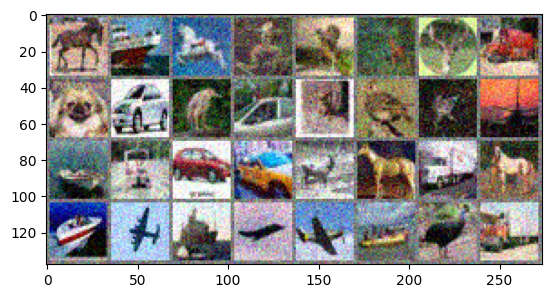

horse  ship horse  frog  bird  deer  deer truck   dog   car  bird   car   dog  bird  frog plane  ship  ship   car   car  deer horse truck horse  ship plane  ship plane plane  ship  bird truck


In [24]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [11]:
torch.cuda.is_available()
torch.cuda.get_device_name(0)
print(torch.cuda.get_device_name(0))

if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 

#dev = "cpu" 
device = torch.device(dev) 
dev = "cuda" 
print(device)

NVIDIA GeForce RTX 4060 Laptop GPU
cuda:0


In [12]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)
print(net)

summary(net, (3,32,32), batch_size=32, device=dev)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 28, 28]           2,432
         MaxPool2d-2           [32, 32, 14, 14]               0
            Conv2d-3           [32, 32, 10, 10]          25,632
         MaxPool2d-4             [32, 32, 5, 5]               0
            Linear-5                  [32, 120]          96,120
            Linear-6                   [32, 84]          10,164
            Linear-7                   [32, 10]             850
Total params: 135,198
Train

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:

%%time
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device,non_blocking=True), labels.to(device, non_blocking=True)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 400 == 399:    # print every 400 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,   400] loss: 0.461
[1,   800] loss: 0.460
[1,  1200] loss: 0.457
[2,   400] loss: 0.394
[2,   800] loss: 0.366
[2,  1200] loss: 0.343
[3,   400] loss: 0.314
[3,   800] loss: 0.306
[3,  1200] loss: 0.297
[4,   400] loss: 0.285
[4,   800] loss: 0.277
[4,  1200] loss: 0.267
[5,   400] loss: 0.258
[5,   800] loss: 0.255
[5,  1200] loss: 0.252
[6,   400] loss: 0.236
[6,   800] loss: 0.232
[6,  1200] loss: 0.233
[7,   400] loss: 0.219
[7,   800] loss: 0.220
[7,  1200] loss: 0.213
[8,   400] loss: 0.204
[8,   800] loss: 0.205
[8,  1200] loss: 0.205
[9,   400] loss: 0.195
[9,   800] loss: 0.194
[9,  1200] loss: 0.193
[10,   400] loss: 0.185
[10,   800] loss: 0.187
[10,  1200] loss: 0.181
[11,   400] loss: 0.174
[11,   800] loss: 0.174
[11,  1200] loss: 0.178
[12,   400] loss: 0.164
[12,   800] loss: 0.167
[12,  1200] loss: 0.166
[13,   400] loss: 0.156
[13,   800] loss: 0.159
[13,  1200] loss: 0.156
[14,   400] loss: 0.150
[14,   800] loss: 0.151
[14,  1200] loss: 0.151
[15,   400] loss: 0

torch.Size([3, 138, 274])


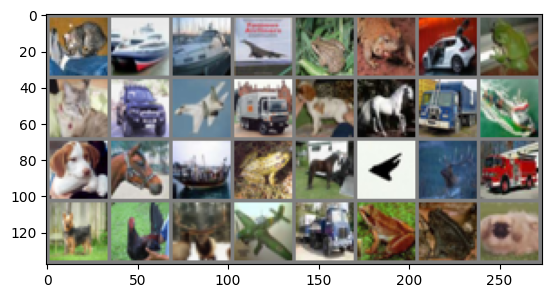

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog
torch.Size([3, 138, 274])


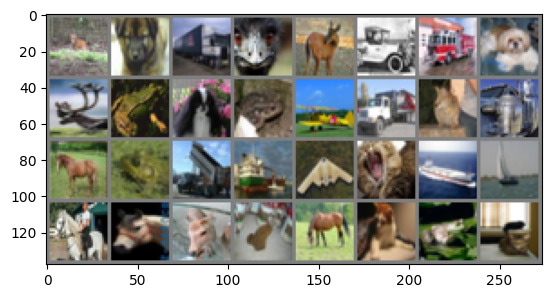

GroundTruth:   deer   dog truck  bird  deer   car truck   dog


In [15]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [16]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

print(device)
net = Net()
net.load_state_dict(torch.load(PATH))
net.to(device)
images = images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# print(outputs)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

cuda:0
Predicted:   deer   dog truck   car  deer truck truck   dog


In [22]:

def test_accuracy(net, testloader, device):
    correct = 0

    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            images = images + 0.2 * torch.randn(images.shape).to(device)
            
            # calculate outputs by running images through the network
            outputs = net(images)

            # the class with the highest energy is what we choose as prediction
            predicted = torch.max(outputs.data, 1)[1]

            correct += (predicted == labels).sum().item()
    
    return correct / len(testloader.dataset)
    
    
def test_accuracy_per_class(net, testloader, device):
    correct_pred = {classname: 0 for classname in trainset.classes}
    total_pred = {classname: 0 for classname in trainset.classes}

    with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = net(images)
            predicted = torch.max(outputs.data, 1)[1]

            # collect the correct predictions for each class
            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    correct_pred[trainset.classes[label]] += 1
                total_pred[trainset.classes[label]] += 1
    
    accuracy_per_class = {classname: 0 for classname in trainset.classes}
    for classname, correct_count in correct_pred.items():
        accuracy = (100 * float(correct_count)) / total_pred[classname]
        accuracy_per_class[classname] = accuracy

    return accuracy_per_class


test_acc = test_accuracy(net, testloader, 'cuda')
print(f'Best trial test set accuracy: {test_acc}')

overall_accuracy = test_accuracy(net, testloader, dev)

print(
    'Overall accuracy of the network  '
    f'{(overall_accuracy * 100):.2f} %\n'
    'on the 10000 test images'
)

accuracy_per_class = test_accuracy_per_class(net, testloader, dev)

print('Accuracy per class\n')
for classname, accuracy in accuracy_per_class.items():
    print(f'{classname:12s} {accuracy:.2f} %')



Best trial test set accuracy: 0.6174
Overall accuracy of the network  61.96 %
on the 10000 test images
Accuracy per class

airplane     78.00 %
automobile   84.40 %
bird         64.50 %
cat          36.60 %
deer         63.40 %
dog          61.90 %
frog         81.40 %
horse        82.50 %
ship         79.90 %
truck        76.90 %


In [ ]:

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')
print(type(trainset.data))
print(type(trainset.targets))
print('\nTest set')
print(f'Samples: {testset.data.shape}')
print(f'Labels: {len(testset.targets)}')

train_n_samples = len(trainset.data)
print(train_n_samples)
test_n_samples = len(testset.data)
print(test_n_samples)

Xtrain = trainset.data
Xtest  = testset.data



from skimage.feature import hog
Xtrain_hog = []
for i in range(len(Xtrain)):
    fd  = hog(Xtrain[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False, channel_axis=-1)
    Xtrain_hog.append(fd)
    if ((i % 10000) == 0): 
        print(i)

Xtrain_hog = np.array(Xtrain_hog)
print('Done calculating HOGs for training')
print(Xtrain_hog.shape)

Xtest_hog = []
for i in range(len(Xtest)):
    fd = hog(Xtest[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False, channel_axis=-1)
    Xtest_hog.append(fd)
    if ((i % 1000) == 0): 
        print(i)
        
Xtest_hog = np.array(Xtest_hog)
print('Done calculating HOGs for testing')

ytrain = trainset.targets
ytest  = testset.targets

from sklearn.decomposition import PCA
pca = PCA(0.8)
Xtrain_pca = pca.fit_transform(Xtrain_hog)
Xtest_pca  = pca.transform(Xtest_hog)
print(Xtrain_pca.shape)
print(Xtest_pca.shape)


In [ ]:
%%time 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_pca, ytrain)

ytest_predict  = clf.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

%%time 
Xtrain_pca = Xtrain_pca[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest_pca[0:5000]
ytest = ytest[0:5000]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_pca, ytrain)

ytest_predict  = clf.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
%%time 
Xtrain_pca = Xtrain_pca[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest_pca[0:5000]
ytest = ytest[0:5000]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
gnb = GaussianNB()
gnb.fit(Xtrain_pca, ytrain)

ytest_predict  = gnb.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
%%time 
Xtrain_pca = Xtrain_hog[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest_hog[0:5000]
ytest = ytest[0:5000]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
gnb = GaussianNB()
gnb.fit(Xtrain_pca, ytrain)

ytest_predict  = gnb.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
print(Xtrain.shape)

Xtrain = Xtrain.reshape(-1, 32 * 32 * 3)
Xtest = Xtest.reshape(-1, 32 * 32 * 3)

In [ ]:
%%time 
Xtrain_pca = Xtrain[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest[0:5000]
ytest = ytest[0:5000]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
gnb = GaussianNB()
gnb.fit(Xtrain_pca, ytrain)

ytest_predict  = gnb.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

## Differentiation using computers 


1. Symbolic differentiation: Automatic manipulation of mathematical expressions to get derivatives
    * Input and output are mathematical expressions
    * Used in Mathematica, Maple, Sympy, etc.
    
    
    
2.  Numeric differentiation: Approximating derivatives by finite differences: 

\begin{equation} 
\frac{\partial f(x_1, \dots, x_N)}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \dots, x_i+h, \dots, x_N) - f(x_1, \dots, x_i-h, \dots, x_N)}{2h}
\end{equation}



3. Automatic differentiation (AD): A method to get exact derivatives efficiently, by storing information as you go forward that you can reuse as you go backwards
 
    * Takes code that computes a function and returns code that computes the derivative of that function.
    * “The goal isn’t to obtain closed-form solutions, but to be able to write a program that efficiently computes the derivatives.”
     * Autograd, Torch Autograd

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

print(9*a**2)
print(a.grad)

In [ ]:
import autograd.numpy as np
from autograd import elementwise_grad as egrad
import matplotlib.pyplot as plt

x = np.linspace(-31.4,31.4, 256)
sinc = lambda x: np.sin(x) / x
plt.figure(figsize=(12,7))
plt.title("sinc function and derivatives", fontsize=24)
my_fn = sinc

for ii in range(5):
    plt.plot(x, my_fn(x), lw=3, label="d{} sinc(x)/dx{}".format(ii,ii))
    plt.legend(fontsize=18)
    plt.axis([-32, 32, -0.50, 1.2])
    my_fn = egrad(my_fn) 

## Differentiable programming 


The idea of computing using building blocks that can be differentiated orinated in Deep Learning but has found applications in other areas. For example it is possible to model chains of digital signal processing effects 
using differentiable DSP. 


## Convolutional neural networks 

In order to preserve local adjacency information, the first hidden layer should receive input from only a small, local region of the image. In addition, we would like approximate **spatial invariance** at small to moderate scales - i.e an edge or an eye should look the same if it appears in a different, small region of the image. 

Constraining the $l$ weights connecting a local region to a unit in the hidden layer to be the same for each hidden unit (i.e $w_{1,i}, \dots w_{l,i}$ should be the same as $w_{1,j}, \dots, w_{l, j}$ for hidden unit $i$ and $j$. A pattern of weights that is replicated across multiple local regions is called a **kernel** and the process of applying the **kernel** to the pixels of an image is called **convolution**. Note that in DSP this is called cross-correlation and convolution means something else. 

Let's illustrate **convolution** with an example in 1D. Consider the sequence $5,6,6,2,5,6,5$ and the **kernel** 
$+1,-1,+1$. This kernel will detect (produce higher values) when there is a "dark" pixel. The result of applying 
the kernel at the first position of the sequence will be: $5-6+6 = 5$. The kernel is then moved by **stride** pixels. For example if the **stride** is two the next output value will be $6-2+5=9$. If the stride is one the next output value will be $6-6+2=2$. 

Convolution is a linear operation and therefore we can propagate gradients through it, just like we did with fully connected networks. 


CNNs were inspired originally by models of the visual cortex proposed in neuroscience. In those models, the **receptive field** of a neuron is the portion of the sensory input that can affect that neuron's activation. 

In [ ]:
# Example of 1D convolution with kernel size 3 and stride 2 

a = np.array([[+1,-1,+1,0,0,0,0],[0,0,+1,-1,+1,0,0], [0,0,0,0,+1,-1,+1]])

b = np.array([[5,6,6,2,5,6,5]])
c = np.matmul(a,b.T)
print(a)
print(b.T)
print('=')
print(c)


## Pooling layer 

A **pooling** layer in a neural network summarizes a set of adjacent units from the preceding layer with a single value. **Average-pooling** computes the average value of its $l$ inputs. Average pooling facilitates multiscale recognition. It also reduces the number of weights required in subsequent layers, leading to lower computational cost and prossibly faster learning. **Max pooling** computes the maximum value of its $l$ inputs. Max-pooling acts as a kind of logical disjunction, saying that a feature exists somewhere in the unit's receptive field. 

In a image classification network the final layer of the network will be a softmax with $c$ output units. The early layers of the CNN are image-sized, so somewhere in between there must be significant reductions in layer size. Convolutional layers and pooling layers with stride larger than 1 all serve to reduce a layer size. 


### Tensors 

Multi-dimensional arrays of any dimension - they keep track of the "shape" of the data as it progress through layers of the network. Describing the CNN in terms of tensors and tensor operators, a deep learning package can generate compiled code that is highly optimized for the underlying computational substrate. 


Support we are traying on $256 \times 256$ RGB images with a minibatch size of $64$. The input will be a 4-dimensional tensor of size $256 \times 256 \times 3 \times 64$. The we applyu 96 kernel of size $5 \times 5 \times 3$ with a stride of $2$ in both $x$ and $y$ dimensions. This gives as an output tensor of size 
$128 \times 128 \times 96 \times 64$. Such a tensor is called a **feature map** - note no dedicated color 
channels but color information has been incorporated if the learning algorithm finds it useful for the final 
predictions of the network. 

Graphical Processing units (GPUs) are specialized hardware for graphics operations that can be used 
to perform tensor operations. Tensor processing units (TPUs) are specialized hardware for computing tensor 
operations that optimize for speed and throughput rather than high numerical precision. 

### Residual networks 

In 2012 it was shown for the first time that a DNN (AlexNet) with 8 neural network layers (5 convolutional and 3 full-connected) was more successful than traditional, hand-crafted feature learning on ImageNet. The success of DNNs is found in these additional layers. It is thought that these layers progressively learn more complex features (for example the first layer might learn edges, the second layer might learn shapes, the third layer might learn objects, etc). 

Networks with many layers suffer from the vanishing/exploding gradient problem. Some of that can be alleviated by batch normalization. Another approach is to user residual blocks that contain skip connections. Skip connection append the output of a layer (with a potential dimension adjustment) by concatenating it with output of subsequent layers. 

The authors of the ResNet architecture test their network with 100 and 1,000 layers on the CIFAR-10 dataset. They tested on the ImageNet dataset with 152 layers, another very popular Deep CNN architecture.





## Learning Algorithms 


Standard gradient descent with $\alpha$ learning rate. The loss L is defined with respect to the entire training set. 

\begin{equation} 
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_{w} L(\mathbf w)
\end{equation} 

Stochastic Gradient Descent (SGD), the loss $L$ is defined with respect to a minibatch of $m$ examples chosen randomly at each step. 

Empirical considerations: 

1. Small-mini batch size helps escape small local minima and computational cost of each weight update is a small constant, independent of training set size. 
2. The gradient contribution of each training example in the SGD minibatch can be computed independently, the minibatch size is often chosen so as to take maximum advantage of hardware parallelism in GPUs or TPUs. 
3. Learning rate needs to decrease over time. Choosing the right schedule is usually a matter of trial and error. 
4. Care must be taken to mitigate numerical instabilities that may arise due to overflow, underflow, and rounding error. 

Process of learning stops when there are diminishing returns. 


### Batch normalization 

### Generalization 

Approaches to improving generalization in deep learning include: 

1. Choosing the right architecture, varying number of layers, connectivity, and types of nodes 
2. Penalizing large weights 
3. Randomly perturing the values passing through the network during training 
4. Data augmentation

Deeper (and narrow) networks tend to do better than shallow and wide networks for the same number of weights. 
Deep learning works well with high-dimensional data such as images, video, speech. They have to a large extent 
replaced preprocessing approaches that extracted features that prevailed prior to 2010. 

**Weight decay** encourages weights to become small in some ways enforcing **reguralization** i.e limiting the complexity of the model. 

**Dropout** 

At each step of training, dropout applies one step of back-propagation learning to a new version of the network that is created by deactivating a randomly chosen subset of the units. 

1. Introduce noise that provides robustness
2. Approximation of large ensemble of thinned networks 
3. Paying attention to all features of the example rather than focusing on just a few 

Usually makes it harder to fit the training set, it is usually necessary to use a larger model and to train it for more iterations. 


**Data augmentation** 

Provide multiple version of the same input (for example for images: add noise, crop, rotate, scale) to increase the size of the training data and the robustness to the various transformations applied. 






### Graduate student descent 

Incremental exploratory work carried out by graduate students to figure out which architectures 
work best for which problems. 




## Recurrent neural networks 

Recurrent neural networks (RNNs) are distinct from feedforward networks in that they allow cycles in the computational graph. Each cycle has a delay i.e units may take as input a value computed from their own output at an earlier steop in the computation. This allows the RNN to have internal state or **memory**.  



## Unsupervised learning and transfer learning 


Unsupervised learning: 

1. Representation learning 
2. Generative modeling 


Joint model $P_w(\mathbf x,\mathbf z)$, where $\mathbf z$ is a set of latent, unobserved variables that represent the content of the data $\mathbf x$ in some way. 

A learned probability model achieves both representation learning (it has constructed meaningful $z$ vectors from the raw $\mathbf x$ vectors) and generative modelingL if we integrate $\mathbf z$ out of $P_{w}(\mathbf x,\mathbf z)$ we obtain $P_{w}(\mathbf x)$. 


1. Probabilistic PCA 
2. Autoencoders 
3. Deep autoregressive models 
4. Generative adversarial networks 
5. Unsupervised translation 
6. Transfer learning and multitask learning 


